# <center> <span style="color:indigo">       Deep Learning</span> </center> 
##  <center> <span style="color:DarkBlue">     Tarea 2. Detección de mosquitos transmisores de enfermedades </span>  </center>
##  <center> <span style="color:DarkBlue"> Karla Guadalupe Ornelas Gamero</span>  </center>
##  <center> <span style="color:DarkBlue"> karla.gameroo@gmail.com</span>  </center>
##  <center> <span style="color:DarkBlue"> agosto 2024</span>  </center>

##  Contenido
1. <span style="color:DarkBlue">Planteamiento del problema (qué hacer)</span>
2. <span style="color:DarkBlue">Planteamiento de la solución (cómo se hizó)</span>
3. <span style="color:DarkBlue">Ejemplo de ejecución (código)</span>
4. <span style="color:DarkBlue">Conclusiones </span>
5. <span style="color:DarkBlue">Referencias</span>


## <span style="color:DarkBlue"> 1. Planteamiento del problema</span>
Actualmente esta la necesidad de programas que ayuden al ser humano, por medio de aprendizaje profundo se busca rellenar esos espacio de necesidad, es por eso que en esta practica se realizara un red neuronal convolucional que sea enrenada para la deteccion de cierto tipos de mosquitos. Esto con la finalidad de que se pueda detectar que tipo de mosquito a picado al usuario y facilitar la deteccion del dengue.

## <span style="color:DarkciónBlue"> 2. Planteamiento de la solución</span>
Para poder resolver el problema necestimos un dataset con imagenes de mosquitos los cuales usuaremos para etrenar la red, tambien necesitaremos de nuestras librerias de python y numpy, matplotlib entre otras, una vez que hayamos limpiado el dataset lo podemos entrenar y asi obtener nuestras conclusiones. 

El código es:



#### Importando librerias

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import cv2
import random
import shutil
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#### Establecer archivos

In [8]:
Path = "C:/Users/Karla/Documents/DiplomadoMLDL/DL/Practica4/" #Depende de la ruta en tu máquina



In [9]:
os.listdir(Path+"data")

['train', 'val']

In [10]:
os.listdir(Path+"data/train")

['Aegypti', 'Albopictus', 'Ambos', 'Train culex']

In [13]:
train_Aegypti = Path+"data/train/Aegypti/"
train_Albopictus = Path+"data/train/Albopictus/"
train_culex = Path+"data/train/Train culex/"

test_Aegypti = Path+"data/val/Aegypti/"
test_Albopictus = Path+"data/val/Albopictus/"
test_culex = Path+"data/val/Test culex/"

locations = [train_Albopictus, test_Albopictus, train_Aegypti,test_Aegypti,train_culex, test_culex]

In [14]:
train_dir_Aegypti = os.listdir(train_Aegypti)
train_dir_Albopictus = os.listdir(train_Albopictus)
test_dir_Aegypti = os.listdir(test_Aegypti)
test_dir_Albopictus = os.listdir(test_Albopictus)
test_dir_culex = os.listdir(test_culex)
train_dir_culex = os.listdir(train_culex)

Mostramos algunas imagenes pero tenemos que limpiarlas

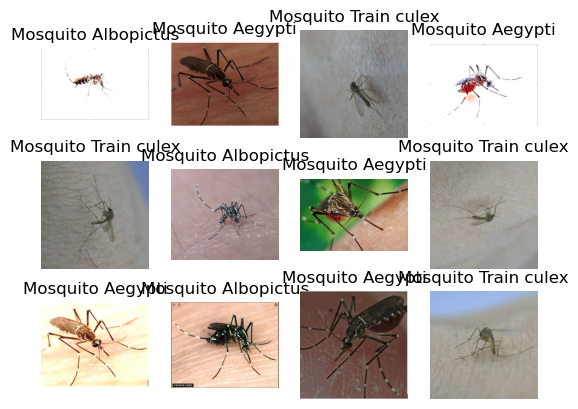

In [17]:

 
# Filtra los archivos en cada directorio para incluir solo imágenes
def get_image_files(directory):
    return [f for f in os.listdir(directory) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
 
# Filtra las listas de archivos para que solo contengan imágenes
files_Aegypti = get_image_files(train_Aegypti)
files_Albopictus = get_image_files(train_Albopictus)
files_culex = get_image_files(train_culex)
 
# Asegúrate de que cada lista tiene archivos válidos antes de continuar
if not files_Aegypti or not files_Albopictus or not files_culex:
    raise ValueError("Uno o más directorios no contienen archivos de imagen válidos.")
 
for i in range(12):
    # Selecciona un archivo aleatorio de cada directorio
    rand_Aegypti = random.choice(files_Aegypti)
    rand_Albopictus = random.choice(files_Albopictus)
    rand_culex = random.choice(files_culex)
 
    # Une las rutas de los archivos con los directorios
    rand_Aegypti_path = os.path.join(train_Aegypti, rand_Aegypti)
    rand_Albopictus_path = os.path.join(train_Albopictus, rand_Albopictus)
    rand_culex_path = os.path.join(train_culex, rand_culex)
 
    # Selecciona aleatoriamente una de las rutas generadas
    rand = random.choice([rand_Aegypti_path, rand_Albopictus_path, rand_culex_path])
    name = os.path.basename(os.path.dirname(rand))  # Obtén el nombre del directorio
 
    plt.subplot(3, 4, i+1)
 
    try:
        img = plt.imread(rand)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.title('Mosquito ' + name)
    except Exception as e:
        print(f"Error al leer la imagen {rand}: {e}")
 
plt.show()


Sample_Image_size(H*W): (372, 653, 3)


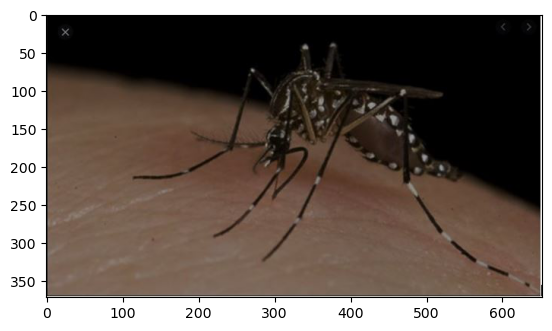

In [22]:
# Ejemplo de una imagen
sample = random.choice(train_dir_Aegypti)
sample = plt.imread(train_Aegypti + sample)
samp = sample.shape
plt.imshow(sample)
print('Sample_Image_size(H*W):', samp)

Se deben reescalar las imagenes para su uso y todas deben ser igual

In [33]:
train = ImageDataGenerator(rescale=1./255)
test = ImageDataGenerator(rescale=1./255)

#### Entrenamiento

Se realizara el entrenamiento y se clasificaran sus clases

In [34]:
train

In [35]:
train_dataset = train.flow_from_directory(Path+"data/train/",
                                          target_size=(150,150),
                                          batch_size = 8,
                                          class_mode = 'binary')

Found 1015 images belonging to 3 classes.


In [36]:
test_dataset = test.flow_from_directory(Path+"data/val/",
                                          target_size=(150,150),
                                          batch_size = 8,
                                          class_mode = 'binary')

Found 130 images belonging to 3 classes.


In [37]:
test_dataset.class_indices

{'Aegypti': 0, 'Albopictus': 1, 'Test culex': 2}

Creamos nuestro modelo de acuerdo a las instrucciones que se nos dió en la asignación de esta tarea.

In [38]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')   
])

Mostramos un resumen del modelo lo cual muestra las capas que tiene éste.

In [39]:
#Considere las capas ya probadas
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 64)      

Por último compilamos el modelo.

In [40]:
model.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

Se entrena el modelo

In [41]:


history = model.fit(
            train_dataset, 
            steps_per_epoch=50,
            epochs=20,
            validation_data=test_dataset, 
            validation_steps=13,
            verbose=2
            )

Epoch 1/20
50/50 - 9s - loss: 0.9998 - accuracy: 0.7025 - val_loss: 0.9086 - val_accuracy: 0.5288 - 9s/epoch - 171ms/step
Epoch 2/20
50/50 - 7s - loss: 0.3505 - accuracy: 0.8475 - val_loss: 0.4746 - val_accuracy: 0.8173 - 7s/epoch - 142ms/step
Epoch 3/20
50/50 - 6s - loss: 0.3420 - accuracy: 0.8500 - val_loss: 0.4709 - val_accuracy: 0.7692 - 6s/epoch - 127ms/step
Epoch 4/20
50/50 - 7s - loss: 0.2812 - accuracy: 0.8700 - val_loss: 0.5935 - val_accuracy: 0.7692 - 7s/epoch - 138ms/step
Epoch 5/20
50/50 - 7s - loss: 0.1827 - accuracy: 0.9325 - val_loss: 1.6857 - val_accuracy: 0.5769 - 7s/epoch - 132ms/step
Epoch 6/20
50/50 - 7s - loss: 0.2208 - accuracy: 0.9098 - val_loss: 0.3515 - val_accuracy: 0.8750 - 7s/epoch - 145ms/step
Epoch 7/20
50/50 - 6s - loss: 0.1899 - accuracy: 0.9100 - val_loss: 0.5690 - val_accuracy: 0.8077 - 6s/epoch - 130ms/step
Epoch 8/20
50/50 - 7s - loss: 0.1855 - accuracy: 0.9200 - val_loss: 0.4374 - val_accuracy: 0.8077 - 7s/epoch - 136ms/step
Epoch 9/20
50/50 - 7s - 

#### Graficación de entrenamiento

Mostramos los datos del entrenamiento que se hizo anteriormente para ver gráficamente el comportamiento que éste tuvo.

Text(0.5, 1.0, 'Loss in training and validation')

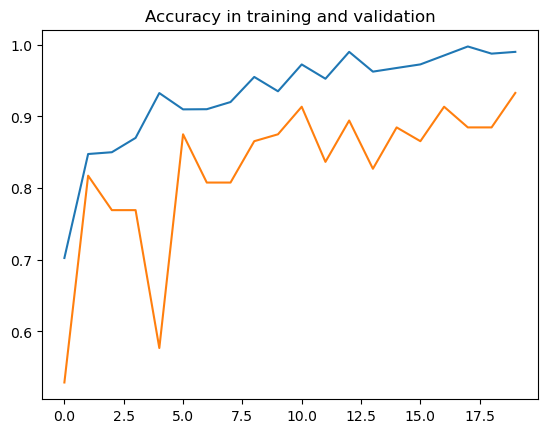

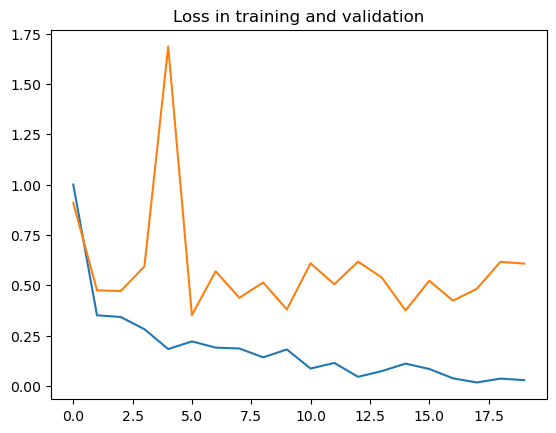

In [42]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) 


plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Accuracy in training and validation')
plt.figure()


plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Loss in training and validation')

#### Pruebas de predicción

Ahora con nuestro modelo ya entrenada se realizan unas pruebas de prediccion con imagenes 

In [44]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    
    plt.imshow(img1)
 
    Y = image.img_to_array(img1)
    
    X = np.expand_dims(Y,axis=0)
    X /= 255
    val = model.predict(X)[0]
    print(val)
    clase = np.argmax(val)
    print(clase)
    if clase == 1:
        
        plt.xlabel("Albopictus",fontsize=30)
    if clase == 2:
        
        plt.xlabel("Culex",fontsize=30) 
    
    elif clase == 0:
        
        plt.xlabel("Aegypti",fontsize=30)

1/1 [==============================] - 0s 161ms/step
[5.9659624e-06 1.8808072e-06 9.9999213e-01]
2


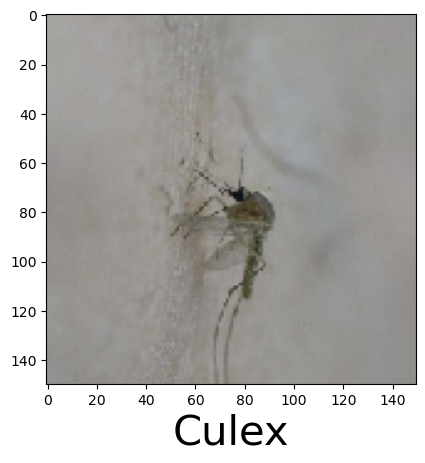

In [45]:
predictImage(Path + "134.jpg")

En el segundo ejemplo se identifico el mosquito como Aegypti el cual es correcto.

1/1 [==============================] - 0s 24ms/step
[0.63475025 0.00901538 0.35623434]
0


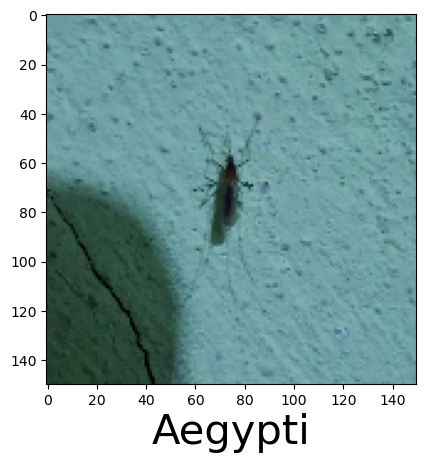

In [47]:
predictImage(Path + "123.jpeg")

En la tercera prueba también se pudo identificar el mosquito de manera éxitosa.

1/1 [==============================] - 0s 34ms/step
[9.9776804e-01 2.2313653e-03 5.5914751e-07]
0


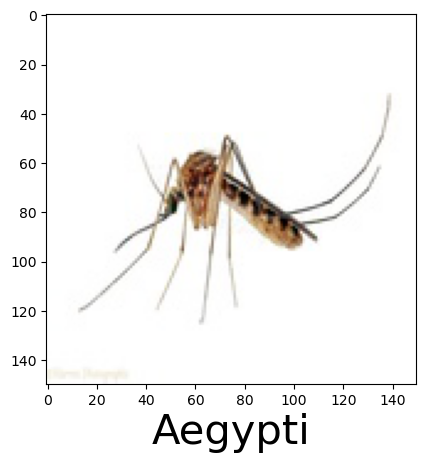

In [49]:
predictImage(Path + "R.jpg")

Lo identifico incorrectamente pero es subjetivo debido a todas las pruebas de imagenes que tenemos

## <span style="color:DarkciónBlue"> 4. Conclusión</span>
Al realizar esta practica uno se percatada de que tan diferente la precision puede ser al realizar las pruebas con diferentes modelos, llegando a la conclusion que este modelo presentado es el que obtiene el mayor porcentaja de presicion llegando arriba del 90%, apesar de la precision que tiene es dificil que reconozca todos los mosquitos . Por medio de este tipo de apredizaje profundo con redes convolucionales hemos podido obtener un modelo que alcance a predecir el tipo de mosquito y si este puede llegar a tener dengue. Las pruebas son claro ejemplo que el modelo tiene muy buen porcentaje de precision por conclusion hemos logrado cumplir con la solucion del problema 



## <span style="color:DarkciónBlue"> 5. Referencias</span>

1. Goodwin, A., Padmanabhan, S., Hira, S. et al. Mosquito species identification using convolutional neural networks with a multitiered ensemble model for novel species detection. Sci Rep 11, 13656 (2021). https://doi.org/10.1038/s41598-021-92891-9

2. Pethuru, R., & Neelamegam, P. (2021). An efficient mosquito recognition model using deep learning techniques. Journal of Ambient Intelligence and Humanized Computing, 12(7), 7233-7242.

3. Fernández-Caramés, T. M., & Fraga-Lamas, P. (2018). A review on the use of deep learning in the characterization and management of mosquitoes. Sensors, 18(8), 2655.

4. Garg, T., & Bhatia, M. (2019). A comparative analysis of deep learning techniques for Aedes mosquito detection. Procedia Computer Science, 165, 320-328.